In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

#1.데이터 전처리

##1.1 결측치 확인

In [184]:
train=pd.read_csv('train.csv')
sample=pd.read_csv('sample_submission.csv')
test=pd.read_csv('test_cloud.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6468 non-null   int64  
 1   date           6468 non-null   object 
 2   bedrooms       6468 non-null   int64  
 3   bathrooms      6468 non-null   float64
 4   sqft_living    6468 non-null   int64  
 5   sqft_lot       6468 non-null   int64  
 6   floors         6468 non-null   float64
 7   waterfront     6468 non-null   int64  
 8   view           6468 non-null   int64  
 9   condition      6468 non-null   int64  
 10  grade          6468 non-null   int64  
 11  sqft_above     6468 non-null   int64  
 12  sqft_basement  6468 non-null   int64  
 13  yr_built       6468 non-null   int64  
 14  yr_renovated   6468 non-null   int64  
 15  zipcode        6468 non-null   int64  
 16  lat            6468 non-null   float64
 17  long           6468 non-null   float64
 18  sqft_liv

In [185]:
df_train=train.drop('price',axis=1).copy()
df=pd.concat([df_train,test],axis=0)
trainidx=len(train)

In [146]:
df.isnull().sum()

,0
id,0
date,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


##1.2 price와 다른 feature의 선형관계 확인

In [32]:
train2=train.copy()

In [33]:
train2['date']

,date
0,20141013T000000
1,20150225T000000
2,20150218T000000
3,20140627T000000
4,20150115T000000
...,...
15025,20141014T000000
15026,20150326T000000
15027,20140521T000000
15028,20150223T000000


In [34]:
train2['date']=train2['date'].apply(lambda x : x[:8])

In [35]:
train2['date'] = pd.to_datetime(train2['date'])

In [36]:
train2['year']=train2['date'].dt.year
train2['month']=train2['date'].dt.month
train2['day']=train2['date'].dt.day

In [37]:
train2.drop('date',axis=1,inplace=True)

In [44]:
train.corr()['price']

,price
id,0.020899
price,1.000000
bedrooms,0.323672
bathrooms,0.525479
sqft_living,0.702899
sqft_lot,0.096793
floors,0.262588
waterfront,0.265738
view,0.400806
condition,0.039740


<Axes: >

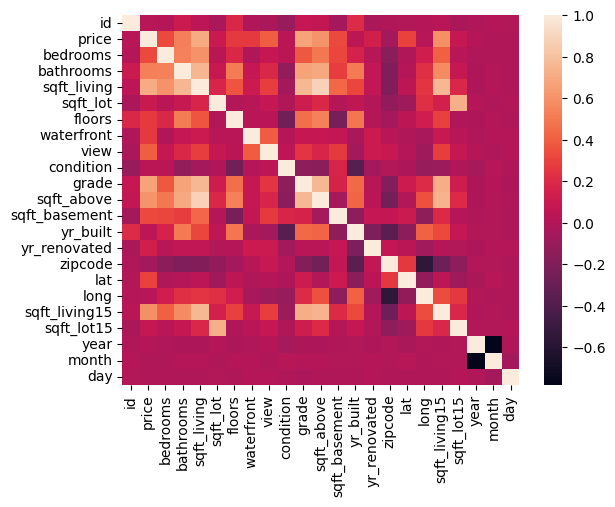

In [46]:
sns.heatmap(train2.corr())

In [11]:
train2['year'].unique()

array([2014, 2015], dtype=int32)

### 1.2.1 이상치

모든 칼럼에 대해 이상치제거를 수행하기에는 주관적판단이 많이 개입되고 데이터 샘플 개수가 줄어드므로 상관관계가 높은 4개의 feature에 대해서만 이상치 탐색

###1.2.1.1 sqft_living

IQR로 이상치 제거하기에는 데이터 분포에 부적절하고 12000 이상의 데이터만 경향성에서 너무 벗어나므로 제거

In [147]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

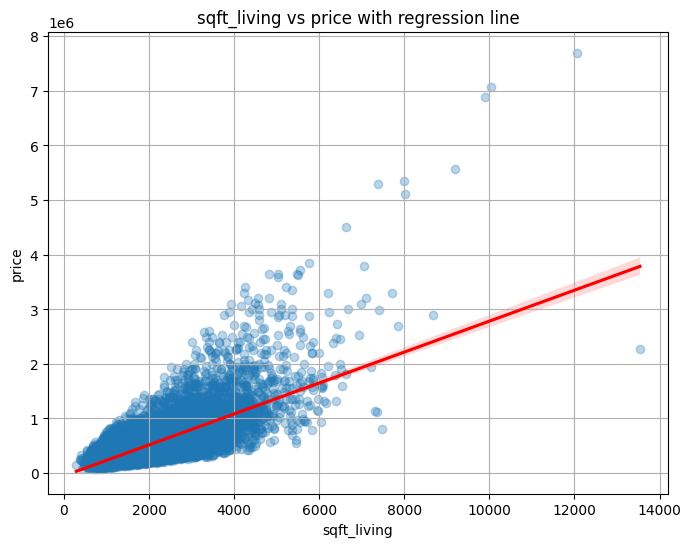

In [207]:
plt.figure(figsize=(8, 6))
sns.regplot(x='sqft_living', y='price', data=train, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('sqft_living vs price with regression line')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.grid(True)
plt.show()

<Axes: xlabel='sqft_living', ylabel='Density'>

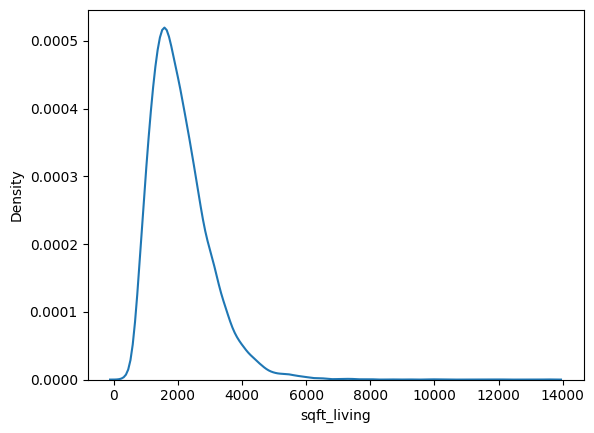

In [206]:
sns.kdeplot(data=train['sqft_living'])

In [200]:
train[train['sqft_living']>12000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5108,5108,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8912,8912,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


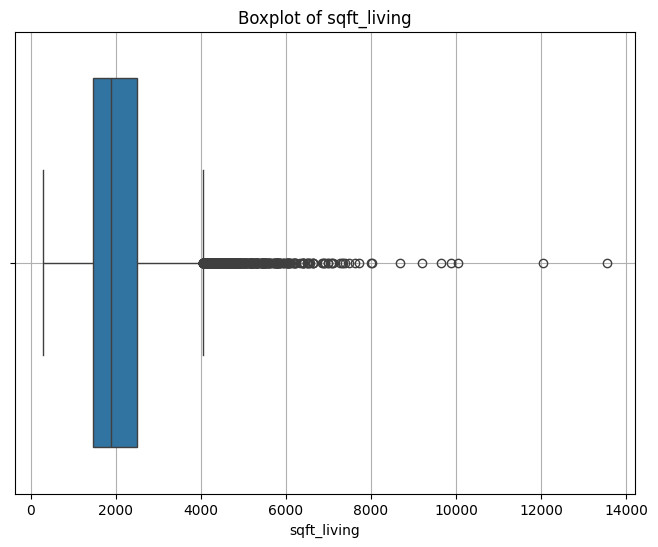

In [196]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['sqft_living'])
plt.title('Boxplot of sqft_living')
plt.grid(True)
plt.show()

In [197]:
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [199]:
upper_bound

np.float64(4047.5)

In [148]:
living_outlier=[5108,8912]

###1.2.1.2 sqft_above

sqft_living과 상당부분 중복된 의미를 가진 feature이므로 더 중요한 sqft_living에서만 제거하기로 결정

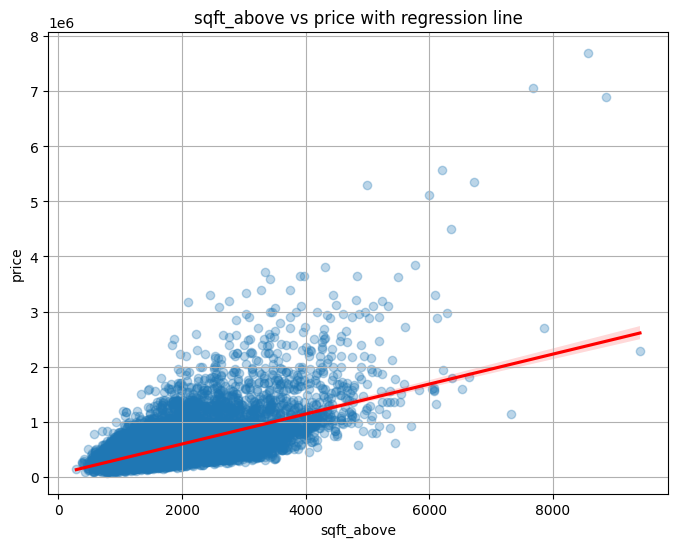

In [208]:
plt.figure(figsize=(8, 6))
sns.regplot(x='sqft_above', y='price', data=train, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('sqft_above vs price with regression line')
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.grid(True)
plt.show()

###1.2.1.3 grade

눈에 띄는 4개의 이상치 제거

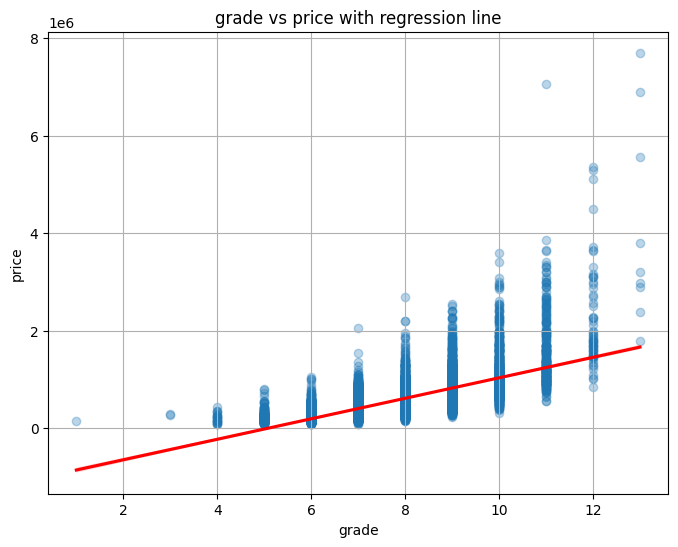

In [209]:
plt.figure(figsize=(8, 6))
sns.regplot(x='grade', y='price', data=train, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('grade vs price with regression line')
plt.xlabel('grade')
plt.ylabel('price')
plt.grid(True)
plt.show()

In [215]:
train[train['grade']==1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13522,13522,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [221]:
train[train['grade']==11].sort_values('price',ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2775,2775,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
1499,1499,20141114T000000,3850000.0,4,4.25,5770,21300,2.0,1,4,...,11,5770,0,1980,0,98040,47.5850,-122.222,4620,22748
4598,4598,20150421T000000,3650000.0,6,4.75,5480,19401,1.5,1,4,...,11,3910,1570,1936,0,98105,47.6515,-122.277,3510,15810
10645,10645,20140911T000000,3640900.0,4,3.25,4830,22257,2.0,1,4,...,11,4830,0,1990,0,98039,47.6409,-122.241,3820,25582
7297,7297,20150508T000000,3400000.0,4,4.00,4260,11765,2.0,0,0,...,11,3280,980,1939,2010,98112,47.6380,-122.288,4260,10408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,4536,20140811T000000,725000.0,3,2.50,3410,41022,2.0,0,0,...,11,3410,0,1990,0,98042,47.3228,-122.080,2150,21429
9849,9849,20140611T000000,657500.0,4,2.75,4140,24190,2.0,0,0,...,11,4140,0,2002,0,98092,47.3062,-122.150,3950,24190
12308,12308,20141219T000000,633000.0,5,2.75,3630,30570,2.0,0,0,...,11,3630,0,2000,0,98058,47.4243,-122.097,3620,41965
943,943,20140523T000000,556000.0,5,2.50,3840,16905,2.0,0,0,...,11,3840,0,1991,0,98023,47.2996,-122.342,3270,12133


In [222]:
train[train['grade']==13].sort_values('price',ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5108,5108,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
6469,6469,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3134,3134,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
4957,4957,20140701T000000,3800000.0,5,5.50,7050,42840,1.0,0,2,...,13,4320,2730,1978,0,98004,47.6229,-122.220,5070,20570
5560,5560,20140923T000000,3200000.0,6,5.00,7100,18200,2.5,0,0,...,13,5240,1860,1933,2002,98199,47.6427,-122.408,3130,6477
7246,7246,20141212T000000,2983000.0,5,5.50,7400,18898,2.0,0,3,...,13,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442
10152,10152,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
4266,4266,20141120T000000,2385000.0,4,4.00,6330,13296,2.0,0,2,...,13,4900,1430,2000,0,98033,47.6488,-122.201,2200,9196
3867,3867,20141010T000000,1780000.0,4,3.25,4890,13402,2.0,0,0,...,13,4890,0,2004,0,98059,47.5303,-122.131,5790,13539


In [149]:
grade_outlier=[13522,2775,5108,6469]

###1.2.1.4 bathrooms

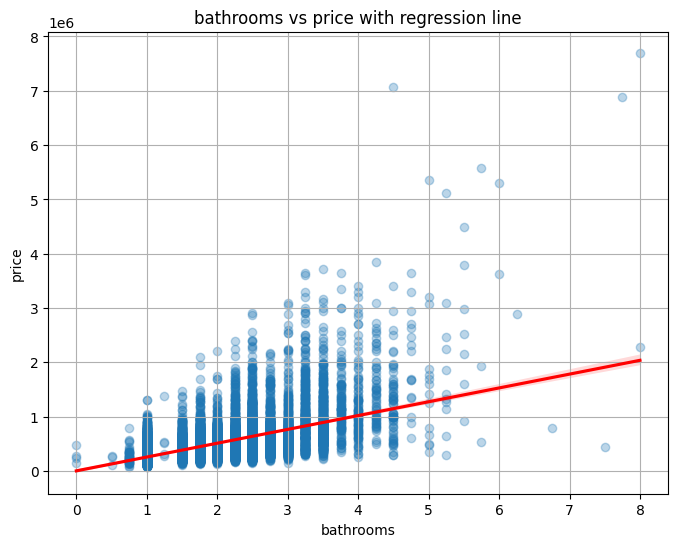

In [227]:
plt.figure(figsize=(8, 6))
sns.regplot(x='bathrooms', y='price', data=train, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('bathrooms vs price with regression line')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.grid(True)
plt.show()

In [231]:
train[train['price']>=6e6]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2775,2775,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
5108,5108,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
6469,6469,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [142]:
df[df['bedrooms']==33]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,living_to_lot_ratio,above_ratio,basement_ratio,bath_per_bed,grade_view,view_condition,view_waterfornt,grade_condition,sqft_total,location_cluster
4710,33,1.75,1620,6000,1.0,0,0,5,7,1040,...,0.27,0.641975,0.358025,0.051471,0,0,0,35,1620,5


In [150]:
bedrooms_outlier=[4710]

In [151]:
bathrooms_outlier=[2775,5108,6469]

In [152]:
outlier=list(set(living_outlier+grade_outlier+bathrooms_outlier+bedrooms_outlier))

In [153]:
outlier

[6469, 4710, 8912, 13522, 5108, 2775]

In [186]:
train.drop(outlier,axis=0,inplace=True)
train.reset_index(drop=True,inplace=True)

In [187]:
label=train['price'].copy()
df_train=train.drop('price',axis=1).copy()
df=pd.concat([df_train,test],axis=0)
trainidx=len(train)

##1.3 feature engineering

기본적으로 DT 기반 model을 쓰기 때문에 다중공선성에는 자유롭지만 상대적으로 feature interaction 능력이 떨어지기 때문에(기본적으로 각 feature 별로 분기를 계산하고 중요하지 않은 feature는 분기기준으로 쓰이지 않을 것이기 때문) feature를 제공하면서 interaction feature도 생성하여 함께 제공하는 방향

feature 선택
1. lat, long은 위치정보로 집값에 직접적 영향이 적지만 데이터셋의 특성상 높은 상관관계를 보이므로 lat,long 정보를 사용함
2. dt기반 모델은 feature 조합능력이 떨어지므로 데이터에서 집값이 가장 높은 lat과 long와의 거리를 feature로 제공
3. zipcode는 위치정보로 집값과 직접적인 영향이 적고 대수적 관계를 가진 것이 아니므로 구간을 나누어서 유사한 위치의 집 값 정보(행정적 위치구분)를 반영하도록 수정하고 이를 토대로 평당 평균 집값 정보를 통해 정보제공
4. year, month는 14,15년 뿐이라 영향은 주겠지만 현재 dataset에서는 부적절하다고 판단
5. day는 직접적인 영향이 없다는 판단에 의해서 제거
6. 구매했을 때의 평방피트가 중요하므로 15년도에 구매한 집만 평방피트 변경, 엄밀히는 집을 구매했을 때 재건축 여부를 알 수 없지만 거의 유사한 feature 2개를 수정하기 원함
7. id는 그냥 필요없음
8. view, grade, condition은 대수관계를 가진 범주이므로 그대로 사용하고 이들의 다양한 조합을 feature에 제공
9. yr_renovated에 재건축 되지않은 건물은 0이 있는데 1900~2000년대와 수치적으로 차이가 너무 나서 모델이 그 의미를 제대로 해석하지 못할 수 있으므로 yr_built와 yr_renovated를 사용해서 feature 재구성
10. k_means를 사용하여 클러스터링 정보 제공
<br>

11. lgbm 결과 zipcode와 cluster를 비교했을 때 zipcode가 feature importance가 높았으므로 zipcode 기반해서 평당 평균 집값 정보를 반영하기로 함
12. 단, 2번과 11번은 label 정보가 반영되므로 valid를 제외한 train 안에서만 계산되어야 information leak가 없으므로 전처리 파이프라인을 별도로 구성

In [190]:
# 원본
df_ori=df.copy()

In [430]:
df=df_ori.copy()

###1.3.1 zipcode, lat, long

In [362]:
df['zipcode'].unique()

array([98178, 98028, 98074, 98003, 98198, 98007, 98115, 98107, 98126,
       98019, 98103, 98002, 98133, 98040, 98030, 98119, 98112, 98027,
       98117, 98058, 98001, 98056, 98166, 98053, 98023, 98105, 98042,
       98008, 98148, 98122, 98004, 98005, 98034, 98125, 98075, 98010,
       98038, 98059, 98092, 98136, 98199, 98032, 98045, 98102, 98077,
       98108, 98168, 98177, 98118, 98006, 98146, 98033, 98052, 98155,
       98024, 98116, 98144, 98011, 98031, 98106, 98065, 98022, 98070,
       98014, 98055, 98072, 98029, 98188, 98109, 98039])

<Axes: xlabel='zipcode', ylabel='Count'>

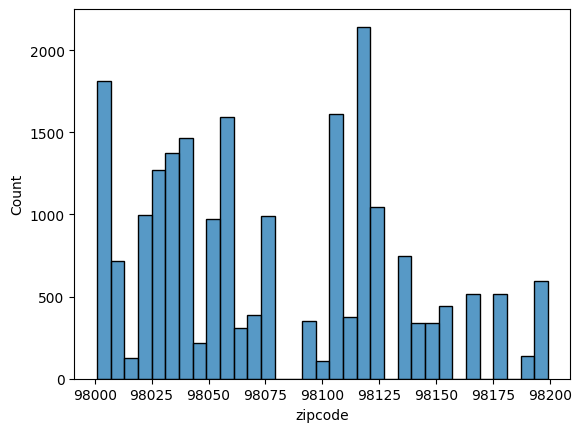

In [364]:
sns.histplot(data=df['zipcode'])

In [13]:
df['zipcode'].value_counts()

,count
zipcode,
98103,600
98038,587
98115,578
98052,571
98117,550
...,...
98102,104
98010,99
98024,79


In [24]:
len(df)/50

429.96

In [25]:
pd.qcut(df['zipcode'], q=50, duplicates='drop').unique() # 대략 bin마다 500개의 430개 data, 통계적으로 안정

[(98168.0, 98178.0], (98027.0, 98028.0], (98072.0, 98074.0], (98002.0, 98004.0], (98178.0, 98198.0], ..., (98105.0, 98106.0], (98059.0, 98065.0], (98065.0, 98072.0], (98053.0, 98055.0], (98038.0, 98039.0]]
Length: 49
Categories (49, interval[float64, right]): [(98000.999, 98002.0] < (98002.0, 98004.0] <
                                            (98004.0, 98005.0] < (98005.0, 98006.0] < ... <
                                            (98166.0, 98168.0] < (98168.0, 98178.0] <
                                            (98178.0, 98198.0] < (98198.0, 98199.0]]

In [306]:
df['zipcode']=pd.qcut(df['zipcode'], q=50, duplicates='drop',labels=False).astype('category')

In [96]:
#dummies=pd.get_dummies(pd.cut(df['zipcode'],bins=10,labels=[98000,98020,98040,98060,98080,98100,98120,98140,98160,98180]),drop_first=True)

In [97]:
#df=pd.concat([df,dummies],axis=1)

In [ ]:
# lightgbm이나 XGboost같은 DT기반 모델을 쓸 것이기 때문에 원핫인코딩은 column 하나당 정보량을 계산하는 분기방식의 dt에 부적합
# 카테고리 형 변수로만 바궈주면 원핫인코딩처럼 한 카테고리에 속하는지 여부 뿐만 아니라 여러 범주의 조합에 대해서 정보량이 가장 큰 분기를 선택함
# 라벨 인코딩은 대수관계로 해석하기 때문에 부적절
# feature가 너무 많아지는 것도 방지

In [268]:
df['zipcode']=pd.qcut(df['zipcode'],q=12,labels=False).astype('category')

In [136]:
#df.drop(['lat','long'],axis=1,inplace=True)

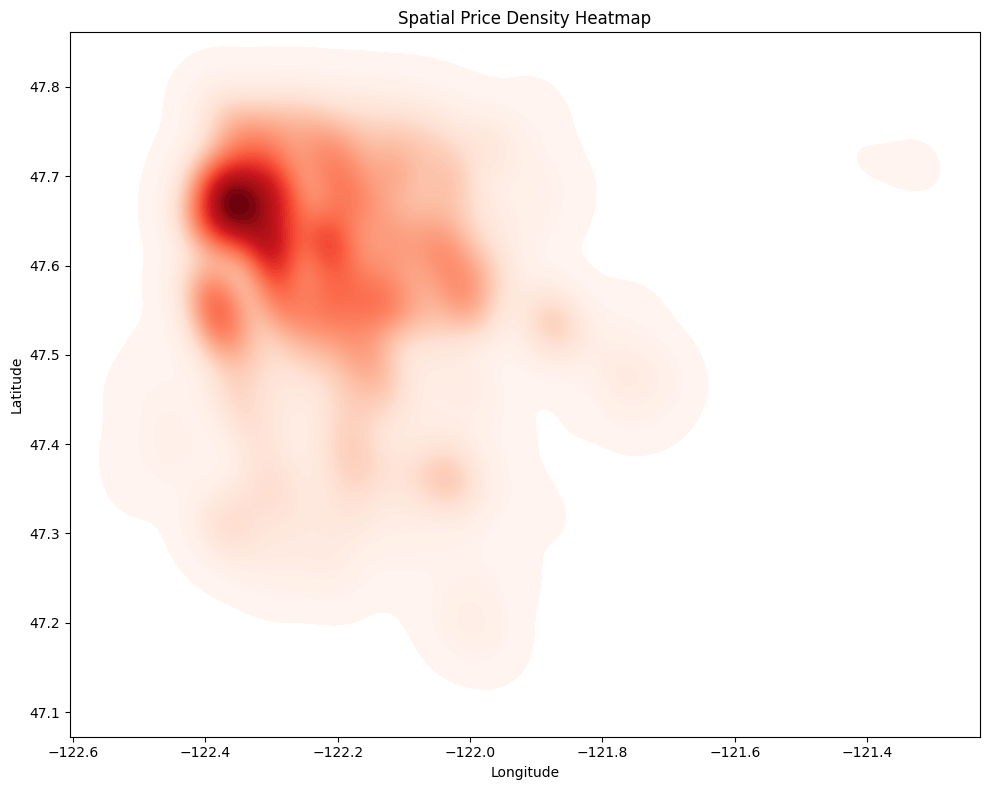

In [15]:
plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=train['long'],
    y=train['lat'],
    weights=train['price'],  # 가격을 밀도의 가중치로 사용
    fill=True,
    cmap='Reds',
    levels=100,
    thresh=0.001
)

plt.title("Spatial Price Density Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

In [16]:
from scipy.stats import gaussian_kde

x = train['long'].values
y = train['lat'].values
weights = train['price'].values

# KDE 계산 (가격을 가중치로)
kde = gaussian_kde([x, y], weights=weights)

x_grid = np.linspace(x.min(), x.max(), 200)
y_grid = np.linspace(y.min(), y.max(), 200)
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])

Z = kde(positions).reshape(X.shape)

idx = np.unravel_index(np.argmax(Z), Z.shape)
center_long = X[idx]
center_lat = Y[idx]

In [172]:
df['distance_from_hotspot'] = np.sqrt((df['lat'] - center_lat)**2 + (df['long'] - center_long)**2)

###1.3.2 평방피트 정보 수정 및 id 제거

In [431]:
df.drop('id',axis=1,inplace=True)

In [432]:
df['date'] = pd.to_datetime(df['date'])
df['year']=df['date'].dt.year

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21590 entries, 0 to 6554
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   21590 non-null  datetime64[ns]
 1   bedrooms               21590 non-null  int64         
 2   bathrooms              21590 non-null  float64       
 3   sqft_living            21590 non-null  int64         
 4   sqft_lot               21590 non-null  int64         
 5   floors                 21590 non-null  float64       
 6   waterfront             21590 non-null  int64         
 7   view                   21590 non-null  int64         
 8   condition              21590 non-null  int64         
 9   grade                  21590 non-null  int64         
 10  sqft_above             21590 non-null  int64         
 11  sqft_basement          21590 non-null  int64         
 12  yr_built               21590 non-null  int64         
 13  yr_reno

In [140]:
df.loc[df['year'] == 2015, 'sqft_living']

,sqft_living
1,770
2,1680
4,1060
5,3560
9,1810
...,...
6540,2850
6543,1900
6547,2780
6551,1190


In [408]:
df.loc[df['year'] == 2015, 'sqft_living']=df[df['year']==2015]['sqft_living15']
df.loc[df['year'] == 2015, 'sqft_lot']=df[df['year']==2015]['sqft_lot15']

In [409]:
df.drop(['date','year','sqft_living15','sqft_lot15'],axis=1,inplace=True)

In [433]:
df.drop(['year'],axis=1,inplace=True)

In [443]:
df['date']=df['date'].astype(int)

In [38]:
train2.groupby('year')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2014,10224.0,536551.574726,354672.667227,78000.0,320000.0,450000.0,642215.0,5570000.0
2015,4806.0,545025.153974,368274.455081,81000.0,325000.0,454675.0,649712.5,5350000.0


###1.3.3 건축연도, 재건축연도

In [130]:
df['yr_built'].unique()

array([1955, 1933, 1987, 1995, 1963, 1965, 1942, 1927, 1977, 1900, 1979,
       1994, 1916, 1921, 1969, 1947, 1968, 1985, 1941, 1915, 1909, 2003,
       1929, 1981, 1930, 1904, 1996, 1984, 2014, 1922, 1966, 1950, 2008,
       1959, 1954, 1989, 2005, 1973, 1972, 1986, 1956, 2002, 1992, 1964,
       1952, 1925, 1961, 2006, 1988, 2001, 1962, 1939, 1967, 1975, 1910,
       1983, 1991, 1905, 1980, 1971, 2010, 1945, 1924, 1978, 1926, 1923,
       1990, 2000, 1976, 1949, 1999, 1901, 1993, 1948, 1920, 1997, 1957,
       2004, 1960, 1940, 1918, 1974, 1911, 1937, 1982, 1908, 1931, 1998,
       1928, 1943, 1907, 2013, 1953, 2012, 2007, 1912, 2011, 1917, 1958,
       1946, 1951, 1932, 1944, 2009, 1903, 1970, 1938, 1919, 1906, 1936,
       1913, 1902, 1914, 2015, 1935, 1934])

In [131]:
df['yr_renovated'].unique() # 0을 처리해야함, 정규화에도 부적합하고 정보가 왜곡됨

array([   0, 2002, 1999, 1991, 1978, 2005, 2008, 2003, 1994, 1984, 1954,
       2014, 2011, 1974, 1983, 2013, 1990, 1957, 1977, 1981, 1995, 2000,
       1986, 1992, 2004, 2007, 1987, 2006, 1985, 1971, 1945, 1979, 1997,
       2010, 1969, 1948, 2009, 1970, 2015, 1989, 2001, 1968, 2012, 1963,
       1993, 1962, 1972, 1980, 1998, 1955, 1996, 1950, 1956, 1982, 1988,
       1940, 1946, 1975, 1964, 1958, 1976, 1973, 1967, 1965, 1944, 1960,
       1953])

1. 년도의 대수관계 명확히 해주기, kaggle 2019기준
age= 2019 - yr_built
2. yr_renovated 칼럼의 정보를 어떻게 모델에 넣어줄 것인가
3. 재건축 여부를 boolean으로 넣어주기 -> 재건축 년도 정보가 손실되고 dt는 연속값에서 정보량을 근거로 유연하게 분기를 선택하는데 더 특화 / boolean은 분기가 1개 뿐임
4. age_renovated = year_renovated - year_built / year_renovated=0인 데이터는 age_renovated=0, 더 많은 정보를 가지고 있고 연속값이라 dt 분기 알고리즘에 적합하고 위 두 feature의 조합을 통해 건축년도와 재건축년도 정보를 완전히 전달가능


In [434]:
df['age']=2019-df['yr_built']

In [435]:
df['age_renovated']=0

In [436]:
df.loc[df['yr_renovated']!=0,'age_renovated']=df.loc[df['yr_renovated']!=0,'yr_renovated']-df.loc[df['yr_renovated']!=0,'yr_built']

In [437]:
df.drop(['yr_built','yr_renovated'],axis=1,inplace=True)

### 1.3.4 ratio feature

In [438]:
df['sqft_above']=np.log1p(df['sqft_above'])
df['sqft_living']=np.log1p(df['sqft_living'])
df['sqft_lot']=np.log1p(df['sqft_lot'])
df['sqft_basement']=np.log1p(df['sqft_basement'])
df['sqft_living15']=np.log1p(df['sqft_living15'])
df['sqft_lot15']=np.log1p(df['sqft_lot15'])

In [399]:
df['living_to_lot_ratio']=df['sqft_living']/df['sqft_lot'] #주거공간 밀도

In [46]:
df[df['sqft_lot']==0]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,age,age_renovated,living_to_lot_ratio


In [400]:
df['above_ratio']=df['sqft_above']/df['sqft_living'] #지상 면적 비중

In [47]:
df[df['sqft_living']==0]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,age,age_renovated,living_to_lot_ratio


In [401]:
df['basement_ratio']=df['sqft_basement']/df['sqft_living'] #지하 면적 비중

In [52]:
df[df['bedrooms']==0]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,age,age_renovated,living_to_lot_ratio,above_ratio,basement_ratio,bath_per_bed
6882,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,98065,47.5265,-121.828,23,0,0.306250,1.000000,0.0,0.00
8823,0,2.50,1500,4675,2.0,0,0,3,7,1490,0,98065,47.5261,-121.826,20,0,0.320856,0.993333,0.0,2.50
12777,0,0.75,384,213444,1.0,0,0,3,4,384,0,98070,47.4177,-122.491,16,0,0.001799,1.000000,0.0,0.75
230,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,98102,47.6362,-122.322,29,0,0.643157,1.000000,0.0,0.00
876,0,0.00,1470,1399,3.0,0,2,3,8,1470,0,98133,47.7145,-122.356,13,0,1.050751,1.000000,0.0,0.00
977,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,98125,47.7222,-122.290,20,0,0.866667,1.000000,0.0,1.50
1383,0,1.00,390,5900,1.0,0,0,2,4,390,0,98118,47.5260,-122.261,66,0,0.066102,1.000000,0.0,1.00
2029,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,98053,47.6642,-122.069,29,0,0.171737,1.000000,0.0,0.00
2489,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,98042,47.3473,-122.151,34,0,0.275273,1.000000,0.0,2.50
2491,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,98038,47.3493,-122.053,16,0,0.319280,1.000000,0.0,2.50


In [402]:
df['bath_per_bed']=df['bathrooms']/(df['bedrooms']+1) #침실 당 화장실 개수

In [403]:
df['grade_view']=df['grade']*df['view'] # 구조적 품질 * 외관 인상
df['view_condition']=df['view']*df['condition'] # 외관 인상 * 관리 상태
df['view_waterfront']=df['view']+(3*df['waterfront']) # 외관 인상 + 리버뷰

In [439]:
df['grade_condition']=df['grade']*df['condition'] # 구조적 품질 * 관리 상태

In [440]:
df['sqft_total']=df['sqft_above']+df['sqft_basement'] # 총 면적

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21497 entries, 0 to 6467
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   bedrooms             21497 non-null  int64   
 1   bathrooms            21497 non-null  float64 
 2   sqft_living          21497 non-null  int64   
 3   sqft_lot             21497 non-null  int64   
 4   floors               21497 non-null  float64 
 5   waterfront           21497 non-null  int64   
 6   view                 21497 non-null  int64   
 7   condition            21497 non-null  int64   
 8   grade                21497 non-null  int64   
 9   sqft_above           21497 non-null  int64   
 10  sqft_basement        21497 non-null  int64   
 11  zipcode              21497 non-null  category
 12  lat                  21497 non-null  float64 
 13  long                 21497 non-null  float64 
 14  age                  21497 non-null  int64   
 15  age_renovated        2149

In [172]:
df['waterfront']=df['waterfront'].astype(int)

### 1.3.5 binary feature

In [54]:
df[df['sqft_basement']==0]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,age,age_renovated,living_to_lot_ratio,above_ratio,basement_ratio,bath_per_bed,sqft_total
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,98178,47.5112,-122.257,64,0,0.208850,1.000000,0.0,0.250000,1180
1,2,1.00,2720,8062,1.0,0,0,3,6,770,...,98028,47.7379,-122.233,86,0,0.337385,0.283088,0.0,0.333333,770
2,3,2.00,1800,7503,1.0,0,0,3,8,1680,...,98074,47.6168,-122.045,32,0,0.239904,0.933333,0.0,0.500000,1680
3,3,2.25,1715,6819,2.0,0,0,3,7,1715,...,98003,47.3097,-122.327,24,0,0.251503,1.000000,0.0,0.562500,1715
4,3,1.50,1650,9711,1.0,0,0,3,7,1060,...,98198,47.4095,-122.315,56,0,0.169910,0.642424,0.0,0.375000,1060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6462,4,2.50,3118,7866,2.0,0,2,3,9,3118,...,98001,47.2931,-122.264,5,0,0.396390,1.000000,0.0,0.500000,3118
6463,3,1.75,1500,11968,1.0,0,0,3,6,1500,...,98010,47.3095,-122.002,5,0,0.125334,1.000000,0.0,0.437500,1500
6464,3,2.00,1400,1230,3.0,0,0,3,8,1490,...,98144,47.5699,-122.288,5,0,1.138211,1.064286,0.0,0.500000,1490
6466,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,98144,47.5944,-122.299,10,0,0.755556,1.000000,0.0,0.250000,1020


In [158]:
df['has_basement'] = (df['sqft_basement'] > 0).astype(int) # feature importance가 낮아서 삭제

In [159]:
df['has_basement']=df['has_basement'].astype('category')

### 1.3.6 kmeans category feature

In [321]:
from sklearn.cluster import KMeans


coords = df[['lat', 'long']]

n_clusters = 8 # 원하는 수로 바꿔가며 실험

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
df['location_cluster'] = kmeans.fit_predict(coords)

In [116]:
from sklearn.metrics import silhouette_score

for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(coords)
    score = silhouette_score(coords, labels)
    print(f"k={k}, Silhouette Score={score:.4f}")

k=2, Silhouette Score=0.3827
k=3, Silhouette Score=0.4308
k=4, Silhouette Score=0.4090
k=5, Silhouette Score=0.3808
k=6, Silhouette Score=0.4042
k=7, Silhouette Score=0.4171
k=8, Silhouette Score=0.4309
k=9, Silhouette Score=0.4252
k=10, Silhouette Score=0.4203
k=11, Silhouette Score=0.4218
k=12, Silhouette Score=0.4199
k=13, Silhouette Score=0.4245
k=14, Silhouette Score=0.4262
k=15, Silhouette Score=0.4128
k=16, Silhouette Score=0.4051
k=17, Silhouette Score=0.4172
k=18, Silhouette Score=0.4257
k=19, Silhouette Score=0.4173
k=20, Silhouette Score=0.4177
k=21, Silhouette Score=0.4122
k=22, Silhouette Score=0.4118
k=23, Silhouette Score=0.4120
k=24, Silhouette Score=0.4105


<Axes: xlabel='long', ylabel='lat'>

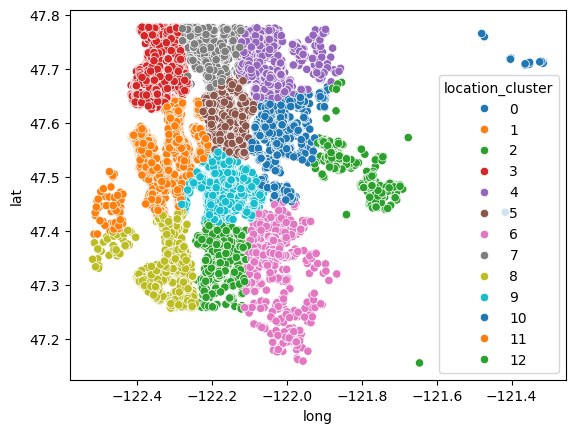

In [123]:
import matplotlib.pyplot as plt
sns.scatterplot(x='long', y='lat', hue='location_cluster', data=df, palette='tab10')

In [322]:
df['location_cluster']=df['location_cluster'].astype('category')

###1.3.7 normalization

In [85]:
columns=list(df.columns)
columns

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'age',
 'age_renovated',
 'living_to_lot_ratio',
 'above_ratio',
 'basement_ratio',
 'bath_per_bed',
 'grade_view',
 'view_condition',
 'view_waterfornt',
 'grade_condition',
 'sqft_total',
 'location_cluster']

In [86]:
columns.remove('waterfront')
columns.remove('location_cluster')
columns.remove('zipcode')

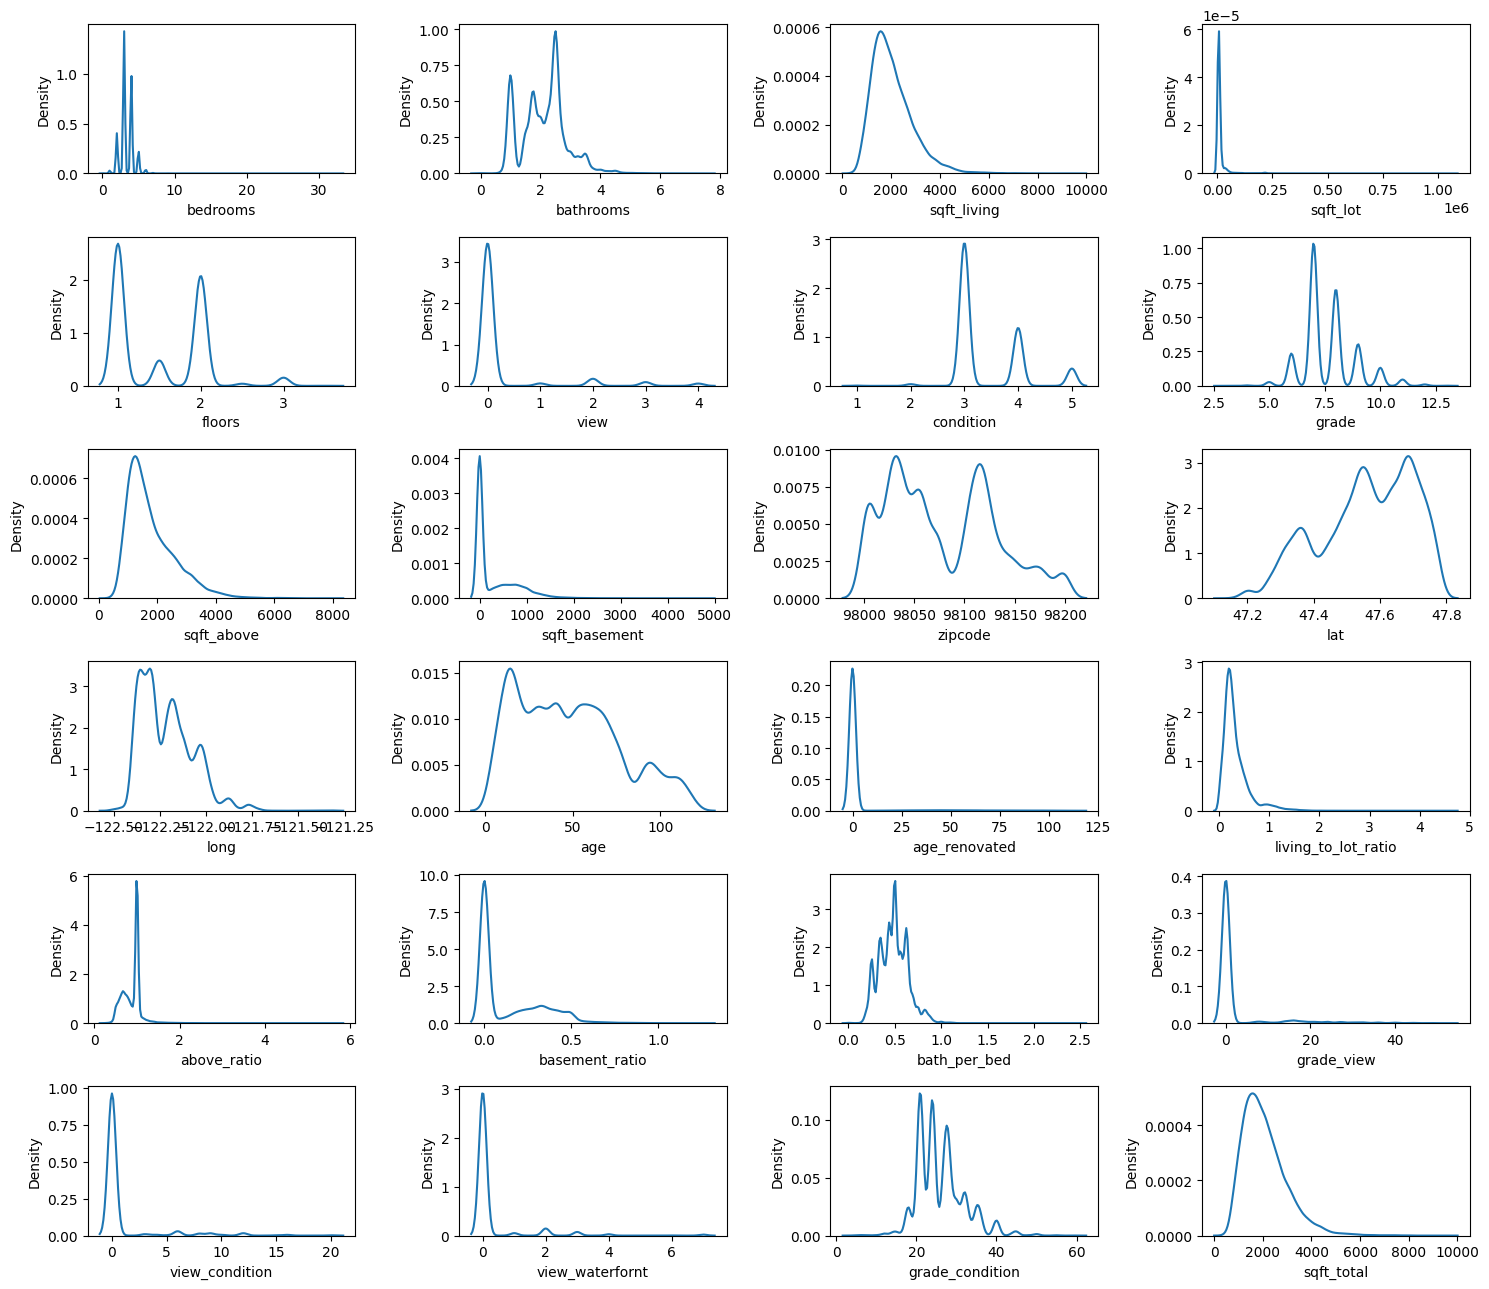

In [88]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 13))
axes = axes.flatten()

for i, col in enumerate(columns):
  sns.kdeplot(data=df[col], ax=axes[i])

plt.tight_layout()
plt.show()

dt기반 모델에서 feature는 분기의 조건이므로 수식 계산에 들어가지 않는다. 따라서 normalization은 필요없다

dt기반 regression model에서는 분류의 정보량 이득과 달리 mse가 감소하는 방향을 분기하기 때문에 label은 직접적으로 계산에 들어가고 scale이 영향이 있다.

따라서 label을 normalization해주는 것은 학습의 안정성에 도움이 된다.

<Axes: xlabel='price', ylabel='Density'>

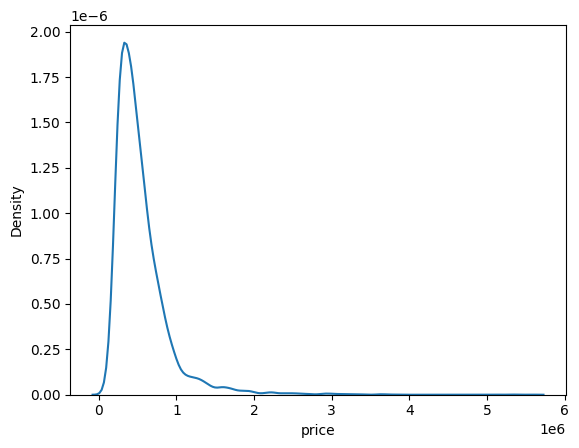

In [89]:
sns.kdeplot(data=label)

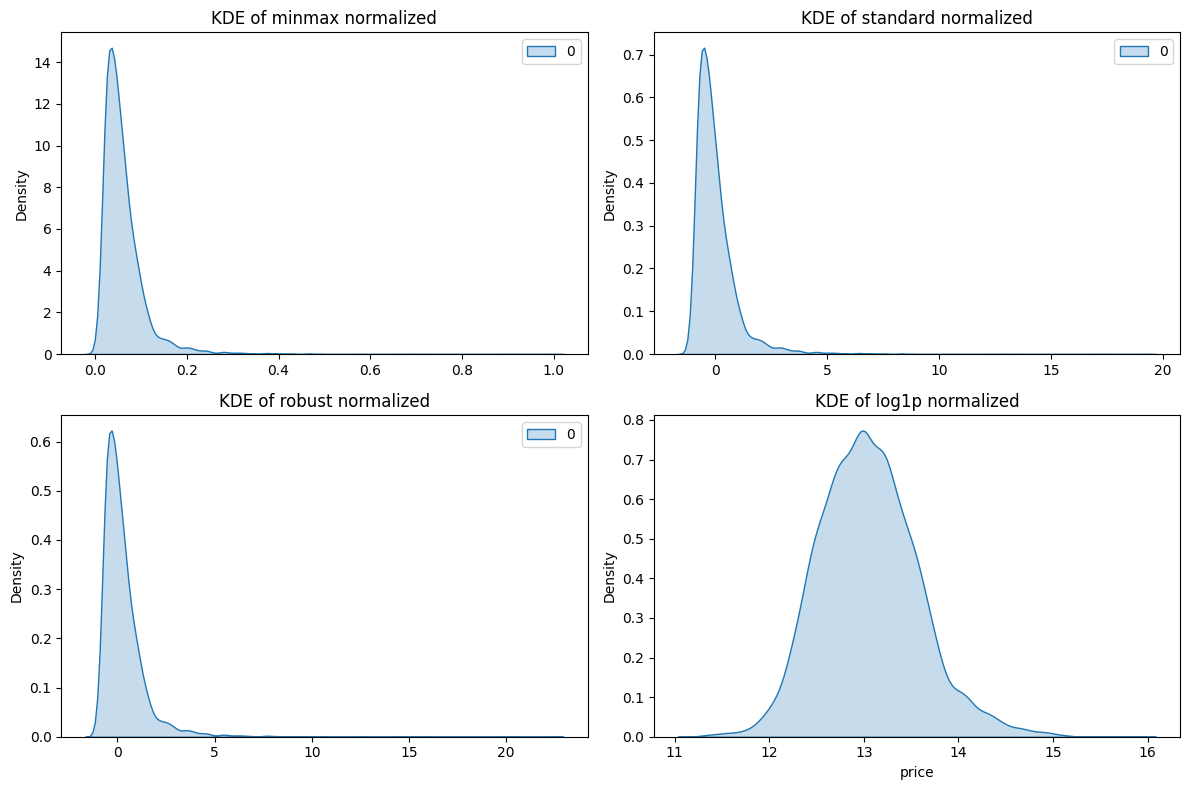

In [167]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

minmax = MinMaxScaler().fit_transform(label.values.reshape(-1,1))
standard = StandardScaler().fit_transform(label.values.reshape(-1,1))
robust = RobustScaler().fit_transform(label.values.reshape(-1,1))
log1p = np.log1p(label)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

sns.kdeplot(data=minmax, ax=axes[0], fill=True)
axes[0].set_title(f"KDE of minmax normalized")
sns.kdeplot(data=standard, ax=axes[1], fill=True)
axes[1].set_title(f"KDE of standard normalized")
sns.kdeplot(data=robust, ax=axes[2], fill=True)
axes[2].set_title(f"KDE of robust normalized")
sns.kdeplot(data=log1p, ax=axes[3], fill=True)
axes[3].set_title(f"KDE of log1p normalized")

plt.tight_layout()
plt.show()

In [285]:
#가장 skew를 줄여주고 정규분포와 유사

loglabel=np.log1p(label)

In [444]:
trainx=df[:trainidx]
testx=df[trainidx:]

1. ridge 모델을 사용할 것이기 때문에 각 feature에 이상치에 강건한 robust scaler를 사용하고 범주형 변수는 feature importance 상 중요해보이지 않기때문에 원핫인코딩 보다는 버리는 쪽으로 선택
2. dt는 feature interaction을 직접 추가해주는 방향으로 진행했지만 선형모델은 다중공선성 문제가 있으므로 dt의 feature importance 기준으로 불필요하다고 판단되는 feature 제거

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21497 entries, 0 to 6467
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   bedrooms             21497 non-null  int64   
 1   bathrooms            21497 non-null  float64 
 2   sqft_living          21497 non-null  int64   
 3   sqft_lot             21497 non-null  int64   
 4   floors               21497 non-null  float64 
 5   waterfront           21497 non-null  int64   
 6   view                 21497 non-null  int64   
 7   condition            21497 non-null  int64   
 8   grade                21497 non-null  int64   
 9   sqft_above           21497 non-null  int64   
 10  sqft_basement        21497 non-null  int64   
 11  zipcode              21497 non-null  category
 12  lat                  21497 non-null  float64 
 13  long                 21497 non-null  float64 
 14  age                  21497 non-null  int64   
 15  age_renovated        2149

12                    lat        1539
14                    age        1301
13                   long        1294
27             zipcut_var         939
3                sqft_lot         936
28  distance_from_hotspot         887
16    living_to_lot_ratio         835
9              sqft_above         762
24             sqft_total         706
11                zipcode         685
26            zipcut_mean         662
17            above_ratio         640
2             sqft_living         636
23        grade_condition         469
19           bath_per_bed         466
8                   grade         328
18         basement_ratio         276
1               bathrooms         253
10          sqft_basement         223
25       location_cluster         217
15          age_renovated         174
20             grade_view         155
4                  floors         131
0                bedrooms         124
7               condition         121
6                    view          78
21         view_condition          70
5              waterfront          53
22        view_waterfornt          40

In [212]:
cols=['location_cluster','view_waterfront','view_condition','bath_per_bed','basement_ratio','grade_view','above_ratio'] #zipcode는 사용 후 제거

In [324]:
trainx_rid=df[:trainidx].drop(cols,axis=1)
testx_rid=df[trainidx:].drop(cols,axis=1)

In [288]:
trainx_rid.shape

(15029, 19)

#2.학습

In [216]:
len(trainx_dt)

15029

In [218]:
len(label)

15029

In [302]:
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import gaussian_kde

class foldpreprocessing(BaseEstimator, TransformerMixin):
  def __init__(self, zipcode='zipcode', lat_col='lat', long_col='long',option=False):
    self.zipcode = zipcode
    self.lat_col = lat_col
    self.long_col = long_col
    self.option = option

  def fit(self, X, y):
    X2=X.copy()
    X2['price']=y
    X2['per_price'] = X2['price'] / X2['sqft_total']

    self.group_means_ = X2.groupby(self.zipcode)['per_price'].mean()
    self.group_vars_ = X2.groupby(self.zipcode)['per_price'].var()

    x = X2['long'].values
    y = X2['lat'].values
    weights = X2['price'].values

    # KDE 계산 (가격을 가중치로)
    kde = gaussian_kde([x, y], weights=weights)

    x_grid = np.linspace(x.min(), x.max(), 200)
    y_grid = np.linspace(y.min(), y.max(), 200)
    X, Y = np.meshgrid(x_grid, y_grid)
    positions = np.vstack([X.ravel(), Y.ravel()])

    Z = kde(positions).reshape(X.shape)

    idx = np.unravel_index(np.argmax(Z), Z.shape)
    self.center_long = X[idx]
    self.center_lat = Y[idx]

    return self

  def transform(self, X):
    X = X.copy()

    X['zipcut_mean'] = X[self.zipcode].map(self.group_means_).astype(float)*X['sqft_total']
    X['zipcut_var'] = X[self.zipcode].map(self.group_vars_).astype(float)*X['sqft_total']

    lat_diff = X[self.lat_col] - self.center_lat
    long_diff = X[self.long_col] - self.center_long
    X['distance_from_hotspot'] = np.sqrt(lat_diff ** 2 + long_diff ** 2)

    if self.option:
      X.drop('zipcode',axis=1,inplace=True)

    return X

In [460]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import RobustScaler

def gridsearcv(train,label,paramgrid,model):
  train2=train.copy()

  pipe = Pipeline([('preprocess', foldpreprocessing()),('model', model)])
  if model.__class__.__name__ == 'Ridge':
    cols=['location_cluster','view_waterfront','view_condition','bath_per_bed','basement_ratio','grade_view','above_ratio']
    train2.drop(cols,axis=1,inplace=True)
    pipe = Pipeline([('preprocess', foldpreprocessing()),('scaler', RobustScaler()),('model', model)])

  grid = GridSearchCV(model, paramgrid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1,refit=True)

  grid.fit(train2, label)

  print(f"{model.__class__.__name__} : {grid.best_params_}")

  return grid.best_params_,grid.best_estimator_

def rmse(y_pred,y_test):
  return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

def rmse2(y1,y2):
  return np.sqrt(mean_squared_error(y1, y2))

def kfold(train,label,test,param1,param2):
  oof_dict = {}
  final_pred_dict = {}
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  model_config = {
        'lgb': (LGBMRegressor, param1),
        'ridge': (Ridge, param2)}

  for name, (modelclass, params) in model_config.items():
    final_pred = np.zeros(len(test))
    oof = np.zeros(len(train))
    train2=train.copy()

    if modelclass.__name__ == 'Ridge':
      cols=['location_cluster','view_waterfront','view_condition','bath_per_bed','basement_ratio','grade_view','above_ratio']
      train2.drop(cols,axis=1,inplace=True)
      test2.drop(cols,axis=1,inplace=True)
    for train_idx, val_idx in kf.split(train2):
      X_train, X_val = train2.iloc[train_idx], train2.iloc[val_idx]
      y_train, y_val = label.iloc[train_idx], label.iloc[val_idx]
      test2=test.copy()
      preprocessing=foldpreprocessing()
      preprocessing.fit(X_train,y_train)
      X_train=preprocessing.transform(X_train)
      X_val=preprocessing.transform(X_val)
      test2=preprocessing.transform(test2)

      if modelclass.__name__ == 'Ridge':
        scaler=RobustScaler()

        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
        X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
        test2 = pd.DataFrame(scaler.transform(test2), columns=test2.columns)

      model = modelclass(**params,random_state=42)
      model.fit(X_train, y_train)

      final_pred += model.predict(test2) / 5
      oof[val_idx] = model.predict(X_val)

    oof_dict[name] = oof
    final_pred_dict[name] = final_pred

  return oof_dict, final_pred_dict

In [462]:
# LightGBM
lgbm_params = {
    'model__n_estimators': [500],
    'model__learning_rate': [0.05],
    'model__max_depth': [-1],
    'model__num_leaves': [31],
    'model__min_child_samples': [20],
    'model__bagging_fraction': [0.8],
    'model__feature_fraction': [0.8],
}

ridge_params = {
    'model__alpha': [1.8],
}

In [463]:
param1_prefix,modela=gridsearcv(trainx,loglabel,lgbm_params,LGBMRegressor(random_state=42))
param2_prefix,modelb=gridsearcv(trainx,loglabel,ridge_params,Ridge())

param1 = {k.replace('model__', ''): v for k, v in param1_prefix.items()}
param2 = {k.replace('model__', ''): v for k, v in param2_prefix.items()}

oof_dict, final_pred_dict = kfold(trainx,loglabel,testx,param1,param2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__feature_fraction
[LightGBM] [Warning] Unknown parameter: model__bagging_fraction
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__min_child_samples
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__feature_fraction
[LightGBM] [Warning] Unknown parameter: model__bagging_fraction
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__min_child_samples
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.24959e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [347]:
oof_dict, final_pred_dict = kfold(trainx_dt,loglabel,testx_dt,param1,param2)

<ipython-input-302-1dea88411b7c>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.group_means_ = X2.groupby(self.zipcode)['per_price'].mean()
<ipython-input-302-1dea88411b7c>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.group_vars_ = X2.groupby(self.zipcode)['per_price'].var()


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3712
[LightGBM] [Info] Number of data points in the train set: 12023, number of used features: 29
[LightGBM] [Info] Start training from score 13.045653
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, s

<ipython-input-302-1dea88411b7c>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.group_means_ = X2.groupby(self.zipcode)['per_price'].mean()
<ipython-input-302-1dea88411b7c>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.group_vars_ = X2.groupby(self.zipcode)['per_price'].var()


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3716
[LightGBM] [Info] Number of data points in the train set: 12023, number of used features: 29
[LightGBM] [Info] Start training from score 13.047018
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, s

<ipython-input-302-1dea88411b7c>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.group_means_ = X2.groupby(self.zipcode)['per_price'].mean()
<ipython-input-302-1dea88411b7c>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.group_vars_ = X2.groupby(self.zipcode)['per_price'].var()


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3714
[LightGBM] [Info] Number of data points in the train set: 12023, number of used features: 29
[LightGBM] [Info] Start training from score 13.045412
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, s

<ipython-input-302-1dea88411b7c>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.group_means_ = X2.groupby(self.zipcode)['per_price'].mean()
<ipython-input-302-1dea88411b7c>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.group_vars_ = X2.groupby(self.zipcode)['per_price'].var()


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3737
[LightGBM] [Info] Number of data points in the train set: 12023, number of used features: 29
[LightGBM] [Info] Start training from score 13.049748
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, s

<ipython-input-302-1dea88411b7c>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.group_means_ = X2.groupby(self.zipcode)['per_price'].mean()
<ipython-input-302-1dea88411b7c>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.group_vars_ = X2.groupby(self.zipcode)['per_price'].var()


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3702
[LightGBM] [Info] Number of data points in the train set: 12024, number of used features: 29
[LightGBM] [Info] Start training from score 13.049715
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, s

<ipython-input-302-1dea88411b7c>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.group_means_ = X2.groupby(self.zipcode)['per_price'].mean()
<ipython-input-302-1dea88411b7c>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.group_vars_ = X2.groupby(self.zipcode)['per_price'].var()
<ipython-input-302-1dea88411b7c>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.group_means_ = X2.groupby(self.zipcode)['p

In [446]:
rmse(oof_dict['ridge'],loglabel)

np.float64(178917.8725811978)

In [447]:
rmse(oof_dict['lgb'],loglabel)

np.float64(109565.70222475033)

In [370]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

def gridsearch_method(oof_dict, label): # 변수선택능력은 필요없으므로 ridge
  oof_matrix = np.vstack([oof_dict['lgb'], oof_dict['ridge']]).T
  cv = KFold(n_splits=5, shuffle=True, random_state=42)

  model = Ridge(fit_intercept=False)
  param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
  grid = GridSearchCV(model, param_grid, cv=cv ,scoring='neg_root_mean_squared_error',refit=True)
  grid.fit(oof_matrix, label)
  ridge_pred = grid.best_estimator_.predict(oof_matrix)

  print(f"{rmse(ridge_pred,label)}")
  return grid.best_estimator_

<Axes: ylabel='Density'>

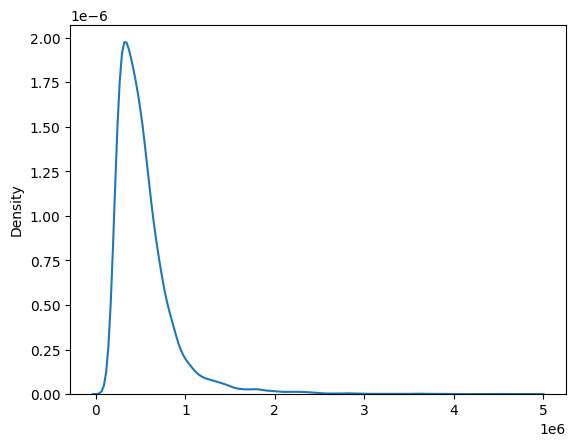

In [43]:
sns.kdeplot(data=oof_dict['lgb'])

In [453]:
blend=gridsearch_method(oof_dict, loglabel)

109508.03424657075


In [474]:
matrix = np.vstack([final_pred_dict['lgb'], final_pred_dict['ridge']]).T
real_pred=blend.predict(matrix)

In [481]:
real_pred=0.7*final_pred_dict['lgb']+0.3*final_pred_dict['ridge']

In [482]:
real_pred=np.expm1(real_pred)

In [483]:
sample['price']=real_pred

In [484]:
sample

,id,price
0,15035,5.611331e+05
1,15036,4.442366e+05
2,15037,1.369217e+06
3,15038,3.192679e+05
4,15039,3.207981e+05
...,...,...
6463,21498,2.208589e+05
6464,21499,3.947393e+05
6465,21500,4.458325e+05
6466,21501,2.942673e+05


In [485]:
sample.to_csv('submission09.csv', index=False)

In [300]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import root_mean_squared_error
import lightgbm


x_train, x_test, y_train, y_test = train_test_split(trainx, loglabel, test_size=0.2, random_state=42)
model = lightgbm.LGBMRegressor(random_state=42)
pipe = Pipeline([('preprocess', foldpreprocessing()),('model', model)])


param_grid = {'model__n_estimators': [500], 'model__max_depth': [13,15,17],'model__learning_rate': [0.05],'model__num_leaves': [31], 'model__min_data_in_leaf': [20]}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1,refit=True)

grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)
print("Best RMSE (CV):", -grid.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


<ipython-input-297-7b37b1dc9d75>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.group_means_ = X2.groupby(self.zipcode)['per_price'].mean()
<ipython-input-297-7b37b1dc9d75>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.group_vars_ = X2.groupby(self.zipcode)['per_price'].var()


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3192
[LightGBM] [Info] Number of data points in the train set: 12023, number of used features: 29
[LightGBM] [Info] Start training from score 13.045653
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best params: {'model__learning_rate': 0.05, 'mode

In [294]:
preprocessed_X = grid.best_estimator_.named_steps['preprocess'].transform(x_train)
feature_importance_df = pd.DataFrame({
    'feature': preprocessed_X.columns,
    'importance': grid.best_estimator_.named_steps['model'].feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

                  feature  importance
12                    lat        1542
13                   long        1400
14                    age        1320
3                sqft_lot        1020
28  distance_from_hotspot         941
16    living_to_lot_ratio         931
9              sqft_above         768
17            above_ratio         667
2             sqft_living         642
27             zipcut_var         640
11                zipcode         600
24             sqft_total         581
26            zipcut_mean         577
19           bath_per_bed         505
23        grade_condition         484
8                   grade         351
18         basement_ratio         286
10          sqft_basement         256
1               bathrooms         252
25       location_cluster         202
15          age_renovated         177
0                bedrooms         160
7               condition         154
4                  floors         139
20             grade_view         138
21         v

In [301]:
y_pred = grid.best_estimator_.predict(x_test)
rmse_test = root_mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
print("Test RMSE:", rmse_test)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Test RMSE: 110551.52471983987


In [138]:
real_pred=grid.best_estimator_.predict(testx)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


In [139]:
sample['price']=np.expm1(real_pred)

In [133]:
sample.to_csv('submission06.csv',index=False)

public score :

회고
dt기반 모델의 feature engineering과 blending에서 cv평균 estimation 방법에 대해 깊이 고민해볼 수 있었다.
115026.89996

#3.trial

In [429]:
# 1. Leaf index 추출
leaf_train = best_model.predict(x_train, pred_leaf=True)
leaf_test = best_model.predict(x_test, pred_leaf=True)

# 3. 원핫 인코딩
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_leaf_train = encoder.fit_transform(leaf_train)
X_leaf_test = encoder.transform(leaf_test)

# 4. 로지스틱 학습 + 예측
from sklearn.linear_model import LinearRegression, Ridge
lr = Ridge()
lr.fit(X_leaf_train, y_train)

y_pred = lr.predict(X_leaf_test)

rmse_test = root_mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
print("Test RMSE:", rmse_test)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Test RMSE: 141040.287783595


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline

def gridsearcv(train,label,paramgrid,model):
  train2=train.copy()
  if model.__class__.__name__ == 'XGBRegressor':
    for col in ['waterfront','zipcode','location_cluster']:
      train2[col]=train2[col].astype('int')

  pipe = Pipeline([('preprocess', foldpreprocessing()),('model', model)])

  grid = GridSearchCV(pipe, paramgrid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)

  grid.fit(train2, label)

  print(f"{model.__class__.__name__} : {grid.best_params_}")

  return grid.best_params_

def rmse(y_pred,y_test):
  return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

def kfold(train,label,test,param1,param2,param3):
  oof_dict = {}
  final_pred_dict = {}
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  model_config = {
        'lgb': (LGBMRegressor, param1),
        'xgb': (XGBRegressor, param2),
        'et' : (ExtraTreesRegressor, param3)}

  for name, (modelclass, params) in model_config.items():
    final_pred = np.zeros(len(test))
    oof = np.zeros(len(train))
    train2=train.copy()
    test2=test.copy()
    if modelclass.__name__ == 'XGBRegressor':
      for col in ['waterfront','zipcode','location_cluster']:
        train2[col]=train2[col].astype('int')
        test2[col]=test2[col].astype('int')
    for train_idx, val_idx in kf.split(train2):
      X_train, X_val = train2.iloc[train_idx], train2.iloc[val_idx]
      y_train, y_val = label.iloc[train_idx], label.iloc[val_idx]

      preprocessing=foldpreprocessing()
      preprocessing.fit(X_train,y_train)
      X_train=preprocessing.transform(X_train)
      X_val=preprocessing.transform(X_val)
      test2_pre=preprocessing.transform(test2.copy())

      model = modelclass(**params,random_state=42)
      model.fit(X_train, y_train)

      final_pred += model.predict(test2_pre) / 5
      oof[val_idx] = model.predict(X_val)

    oof_dict[name] = oof
    final_pred_dict[name] = final_pred

  return oof_dict, final_pred_dict

In [ ]:
lgbm_params = {'n_estimators': [300,500], 'max_depth': [11,13,15],'learning_rate': [0.05],'num_leaves': [31], 'min_data_in_leaf': [20]}

xgb_params = {
    'n_estimators': [300, 500],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.03, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

et_params = {
    'n_estimators': [300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
# LightGBM
lgbm_params = {
    'model__n_estimators': [300, 500,700],
    'model__learning_rate': [0.05],
    'model__max_depth': [-1, 10],
    'model__num_leaves': [31, 64],
    'model__min_child_samples': [20, 30],
    'model__bagging_fraction': [0.8, 0.9],
    'model__feature_fraction': [0.8, 0.9],
}

# XGBoost
xgb_params = {
    'model__n_estimators': [500, 800, 1100],
    'model__learning_rate': [0.01, 0.02],
    'model__max_depth': [6, 8],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
}

# ExtraTrees
et_params = {
    'model__n_estimators': [300, 500],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt', 'log2']
}

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

def gridsearch_method(oof_dict, label):
  oof_matrix = np.vstack([oof_dict['lgb'], oof_dict['xgb'], oof_dict['et']]).T
  scaler = StandardScaler()
  oof_matrix_scaled = scaler.fit_transform(oof_matrix)
  blending_weight={}
  cv = KFold(n_splits=5, shuffle=True, random_state=42)

  model = Ridge()
  param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
  grid = GridSearchCV(model, param_grid, cv=cv ,scoring='neg_root_mean_squared_error')
  grid.fit(oof_matrix_scaled, label)
  ridge_pred = grid.best_estimator_.predict(oof_matrix_scaled)
  blending_weight['ridge']=grid.best_estimator_

  model = Lasso()
  grid = GridSearchCV(model, param_grid, cv=cv ,scoring='neg_root_mean_squared_error')
  grid.fit(oof_matrix_scaled, label)
  lasso_pred = grid.best_estimator_.predict(oof_matrix_scaled)
  blending_weight['lasso']=grid.best_estimator_

  model = ElasticNet()
  param_grid = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}
  grid = GridSearchCV(model, param_grid, cv=cv,scoring='neg_root_mean_squared_error')
  grid.fit(oof_matrix_scaled, label)
  elasticnet_pred = grid.best_estimator_.predict(oof_matrix_scaled)
  blending_weight['elastic']=grid.best_estimator_

  print(f"{rmse(ridge_pred,label)}")
  print(f"{rmse(lasso_pred,label)}")
  print(f"{rmse(elasticnet_pred,label)}")
  return blending_weight, scaler